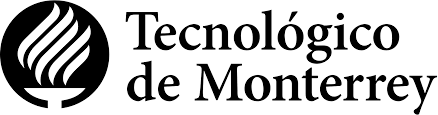

# <center>Actividad Semanal 7: Regresiones y K-means</center>
## Ciencia y Analítica de datos
## Profesor Titular: María de la Paz Rico Fernández
## _Maestría en Inteligencia Artificial Aplicada (MNA-V)_

### 09/11/2022
#### _Andrés Eduardo Figueroa García - A01378536_

<a id='Instrucciones'></a>
### Instrucciones

#### Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
2. Regresión Lineal.
 * Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
3. Regresión Polinomial.
 * Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
5. Finalmente grafica:
 * MAE (de los cuatro métodos)
 * R2 (de los cuatro métodos)
6. Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?


#### Ejercicio 2. Regresión múltiple.

Encuentra el mejor regresor para los datos de las casas:

1. Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
2. Regresión Múltiple Lineal.
 * Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.
3. Regresión Múltiple Polinomial.
 * Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.
4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.
5. Finalmente gráfica :
 * MAE (de los cuatro métodos)
 * R2 (de los cuatro métodos)
6. Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
7. Agrega las conclusiones


#### Ejercicio 3. K means.

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

1. Encuentra el numero ideal de almacenes, justifica tu respuesta:

 * Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
 * ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

* ¿Qué librerías nos pueden ayudar a graficar este tipo de datos?
* ¿Consideras importante que se grafique en un mapa?, ¿por qué?
* Agrega las conclusiones

### 0. Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import qeds
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
import geopy

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

### 1. Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

Se importa el DataFrame que se va a utilizar.

In [2]:
path = 'https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv'
df = pd.read_csv(path)

Se separan los datos en X y Y.

In [3]:
X = df[['Number of Units']]
Y = df[['Manufacturing Cost']]

Se crean dos diccionarios vacío para los errores que se utilizarán más adelante.

In [4]:
MAE = dict()
R2 = dict()

Se grafican los datos a fin de tener una mejor idea de lo que se va a modelar.

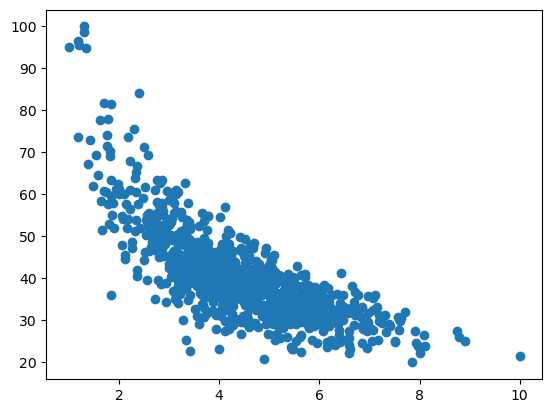

In [5]:
plt.scatter(X,Y)
plt.show()

#### 1.1 Divide los datos del costo de manufactura.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### 1.2 Regresión Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [7]:
LinReg = LinearRegression(fit_intercept=True)
LinReg.fit(x_train.values, y_train);

**Ecuación**

In [8]:
coef = LinReg.coef_
inter = LinReg.intercept_

print('La ecuación del modelo es\n \ny_hat = {:.2f}x + {:.2f}'.format(coef[0][0], inter[0]))

La ecuación del modelo es
 
y_hat = -6.12x + 67.52


**Visualización**

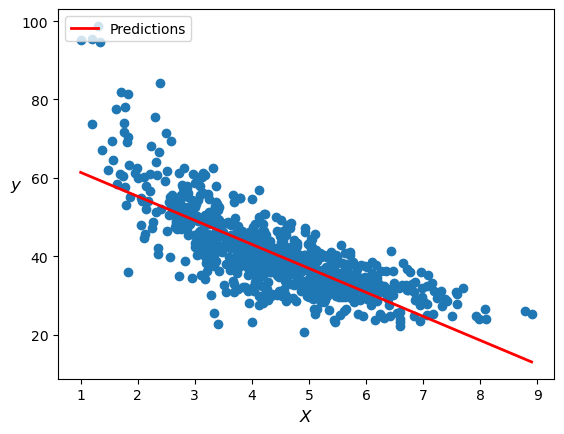

In [9]:
x_fit = np.linspace(x_train.min(), x_train.max(), 100)
y_fit = LinReg.predict(x_fit)

plt.scatter(x_train, y_train)
plt.plot(x_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=10);
plt.show()

**Errores**

In [10]:
model = 'Regresion Linear'

y_hat = LinReg.predict(x_test.values)

R2[model] = r2_score(y_test, y_hat)
MAE[model] = mean_absolute_error(y_test, y_hat)

print('El modelo tiene un error R2 = {:.4f} y MAE = {:.4f} en el conjunto de prueba'.format(R2[model], MAE[model]))

El modelo tiene un error R2 = 0.5527 y MAE = 4.8902 en el conjunto de prueba


#### 1.3 Regresión Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [11]:
poly_features = PolynomialFeatures(degree=6, include_bias=False)
x_poly = poly_features.fit_transform(x_train.values)

LinReg = LinearRegression(fit_intercept=True)
LinReg.fit(x_poly, y_train);

**Ecuación**

In [12]:
coef = LinReg.coef_
names = poly_features.get_feature_names_out()
inter = LinReg.intercept_

print('La ecuación del modelo es\n')
equation = list(map(''.join, zip(coef.round(2).astype(str)[0], names)))
equation = 'y = ' + ' {:.2f} + '.format(inter[0]) + ' + '.join(equation)
equation = equation.replace('x0', 'x')
equation = equation.replace('Number of Units', 'x')

print(equation)

La ecuación del modelo es

y =  196.79 + -161.51x + 78.23x^2 + -21.14x^3 + 3.18x^4 + -0.25x^5 + 0.01x^6


**Visualización**

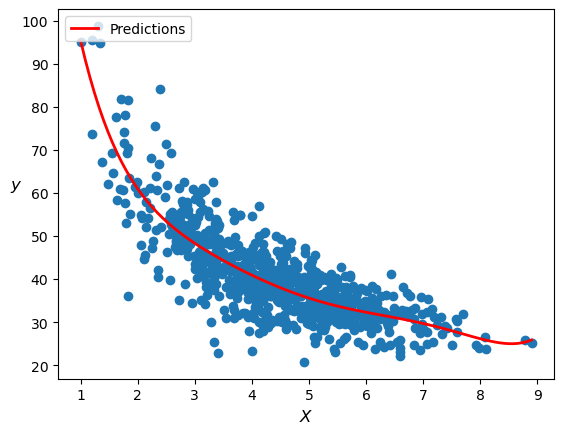

In [13]:
x_fit = np.linspace(x_train.min(), x_train.max(), 100)
x_poly = poly_features.fit_transform(x_fit)
y_fit = LinReg.predict(x_poly)

plt.scatter(x_train, y_train)
plt.plot(x_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=10);
plt.show()

**Errores**

In [14]:
model = 'Regresion Polinomial'

x_poly = poly_features.fit_transform(x_test)
y_hat = LinReg.predict(x_poly)

R2[model] = r2_score(y_test, y_hat)
MAE[model] = mean_absolute_error(y_test, y_hat)

print('El modelo tiene un error R2 = {:.4f} y MAE = {:.4f} en el conjunto de prueba'.format(R2[model], MAE[model]))

El modelo tiene un error R2 = 0.6819 y MAE = 4.3237 en el conjunto de prueba


#### 1.4 Realiza la regresión con Ridge y Lasso.

**Ridge**

In [15]:
LinReg = Ridge()
LinReg.fit(x_train, y_train);

model = 'Ridge'

y_hat = LinReg.predict(x_test)

R2[model] = r2_score(y_test, y_hat)
MAE[model] = mean_absolute_error(y_test, y_hat)

print('El modelo tiene un error R2 = {:.4f} y MAE = {:.4f} en el conjunto de prueba'.format(R2[model], MAE[model]))

El modelo tiene un error R2 = 0.5528 y MAE = 4.8890 en el conjunto de prueba


**Lasso**

In [16]:
LinReg = Lasso()
LinReg.fit(x_train, y_train);

model = 'Lasso'

y_hat = LinReg.predict(x_test)

R2[model] = r2_score(y_test, y_hat)
MAE[model] = mean_absolute_error(y_test, y_hat)

print('El modelo tiene un error R2 = {:.4f} y MAE = {:.4f} en el conjunto de prueba'.format(R2[model], MAE[model]))

El modelo tiene un error R2 = 0.5552 y MAE = 4.7809 en el conjunto de prueba


#### 1.5 Gráficas.

##### MAE

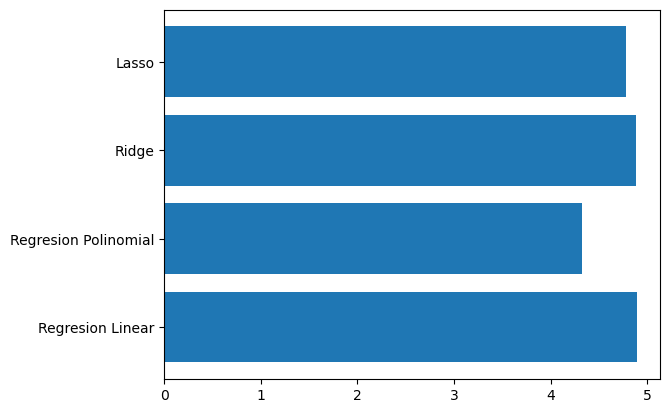

In [17]:
D = MAE

plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), list(D.keys()))
plt.show()

##### R2

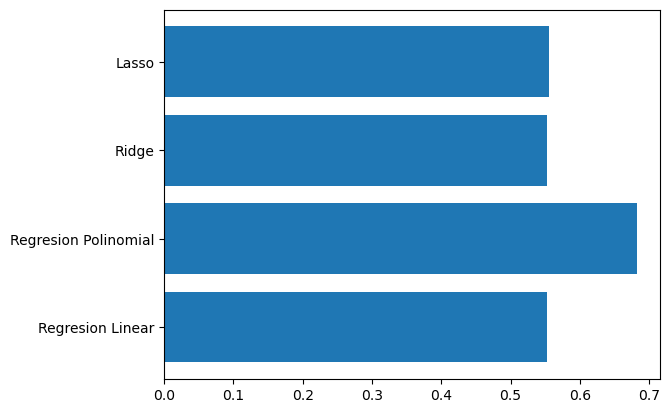

In [18]:
D = R2

plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), list(D.keys()))
plt.show()

#### 1.6 Explica resultados.

¿Qué método conviene más a la empresa?, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Se puede observar que en este caso la Regresión Polinomial es la que conviene más, ya que tiene el menor $MAE$, al mismo tiempo maximiza el $R^2$. La razón es que permite la incorporación de de un término cuadrático que, dada la forma curva de los datos, permite un mejor ajuste del modelo a estos. Por otra parte, La Regresión Lineal, así como Ridge y Lasso, no tienen este ajuste cuadrático por sí mismo y dependen de una transformación previa de los datos en caso que nos interesara mejorarlos.

Haciendo un análsis de los datos y teniendo en cuenta que se trata de la relación entre piezas fabricadas y el costo de fabricación de estas, tiene sentido el comportamiento curvo de los datos. Al tratarse de la fabricación de piezas, seguramente se cuentan con gastos fijos como sueldos, renta de local, etc. Estos son gastos que sin importar si se hacen pocas piezas o muchas, se tienen que pagar, pero al ser más pizas, el costo se proratea entre todas. En cambio, hay gastos que dependen directamente de las piezas producidas como lo pueden ser materias primas o servicios relacionados con la operación como agua o luz. A una mayor cantidad de piezas producidas el costo por pieza se mantiene o puede llegar a aumentar si se consideran horas extras de empleados para llegar a una producción.

Para el conjunto de entrenamiento trabajé con un 80% y en el caso del conjunto de prueba fue el 20% restante. En esta ocasión el porcentaje fue probado en distintar proporciones sin poder notrar un cambio aparente. Finalmente se optó por conservar la relación 80-20 por ser el empleado en casos anteriores. Una forma de validar este pocentaje sería con la función learning_curve de sklearn, la cual nos permite ver el comportamiento de un score a medida que se cambia la proporción del entrenamiento y prueba.

### Ejercicio 2. Regresión múltiple.

Se importa el DataFrame que se va a utilizar. Al mismo tiempo, se cambia la columna de la fecha, la cual es de tipo string y no se podrá convertir a float o int en la presentación actual.

In [19]:
path = 'https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv'
df = pd.read_csv(path)
df['date'] = df['date'].apply(lambda x: int(x[:8]))

Se separan los datos en X y Y.

In [20]:
X = df.drop(['price'], axis=1)
Y = df[['price']]

Se crean dos diccionarios vacío para los errores que se utilizarán más adelante.

In [21]:
MAE = dict()
R2 = dict()

#### 2.1 Divide los datos de las casas.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### 2.2 Regresión Múltiple Lineal.

Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [23]:
LinReg = LinearRegression(fit_intercept=True)
LinReg.fit(x_train.values, y_train);

**Ecuación**

In [24]:
coef = LinReg.coef_
columns = X.columns
xs = ['x'] * columns.size
number = np.linspace(0, columns.size-1, columns.size).astype(int).astype(str).tolist()
names = list(map(''.join, zip(xs, number)))
inter = LinReg.intercept_

print('La ecuación del modelo es\n')
equation = list(map(''.join, zip(coef.round(2).astype(str)[0], names)))
equation = 'y = ' + ' {:.2f} + '.format(inter[0]) + ' + '.join(equation)

print(equation + '\n')

equivalencia = list(map(' = '.join, zip(names, columns)))
print('Donde:\n\t' + '\n\t'.join(equivalencia))

La ecuación del modelo es

y =  -61907301.62 + -0.0x0 + 3.3x1 + -35006.53x2 + 39496.31x3 + 112.88x4 + 0.17x5 + 8091.9x6 + 606169.57x7 + 52525.27x8 + 27516.66x9 + 93905.44x10 + 72.75x11 + 40.12x12 + -2605.84x13 + 21.02x14 + -569.57x15 + 606969.42x16 + -220253.35x17 + 24.12x18 + -0.48x19

Donde:
	x0 = id
	x1 = date
	x2 = bedrooms
	x3 = bathrooms
	x4 = sqft_living
	x5 = sqft_lot
	x6 = floors
	x7 = waterfront
	x8 = view
	x9 = condition
	x10 = grade
	x11 = sqft_above
	x12 = sqft_basement
	x13 = yr_built
	x14 = yr_renovated
	x15 = zipcode
	x16 = lat
	x17 = long
	x18 = sqft_living15
	x19 = sqft_lot15


**Errores**

In [25]:
model = 'Regresion Linear'

y_hat = LinReg.predict(x_test.values)

R2[model] = r2_score(y_test, y_hat)
MAE[model] = mean_absolute_error(y_test, y_hat)

print('El modelo tiene un error R2 = {:.4f} y MAE = {:.4f} en el conjunto de prueba'.format(R2[model], MAE[model]))

El modelo tiene un error R2 = 0.6966 y MAE = 121539.6445 en el conjunto de prueba


#### 2.3 Regresión Múltiple Polinomial.

Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [26]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x_train.values)

LinReg = LinearRegression(fit_intercept=True)
LinReg.fit(x_poly, y_train);

**Ecuación**

In [27]:
coef = LinReg.coef_
names = poly_features.get_feature_names_out()
inter = LinReg.intercept_

print('La ecuación del modelo es\n')
equation = list(map(''.join, zip(coef.round(2).astype(str)[0], names)))
equation = 'y = ' + ' {:.2f} + '.format(inter[0]) + ' + '.join(equation)
# equation = equation.replace('x0', 'x')
equation = equation.replace('Number of Units', 'x')

print(equation + '\n')

columns = X.columns
xs = ['x'] * columns.size

equivalencia = list(map(' = '.join, zip(names, columns)))
print('Donde:\n\t' + '\n\t'.join(equivalencia))

La ecuación del modelo es

y =  -17821028.64 + -0.0x0 + -0.0x1 + 0.0x2 + 0.0x3 + -0.0x4 + -0.0x5 + -0.0x6 + 0.0x7 + -0.0x8 + 0.0x9 + 0.0x10 + -0.0x11 + -0.0x12 + 0.0x13 + -0.0x14 + -0.0x15 + -0.0x16 + 0.0x17 + -0.0x18 + -0.0x19 + 0.0x0^2 + 0.0x0 x1 + -0.0x0 x2 + 0.0x0 x3 + 0.0x0 x4 + -0.0x0 x5 + -0.0x0 x6 + -0.0x0 x7 + -0.0x0 x8 + -0.0x0 x9 + -0.0x0 x10 + -0.0x0 x11 + -0.0x0 x12 + 0.0x0 x13 + 0.0x0 x14 + -0.0x0 x15 + 0.0x0 x16 + 0.0x0 x17 + -0.0x0 x18 + -0.0x0 x19 + 0.0x1^2 + -0.0x1 x2 + 0.0x1 x3 + -0.0x1 x4 + -0.0x1 x5 + 0.0x1 x6 + 0.03x1 x7 + 0.0x1 x8 + 0.0x1 x9 + 0.01x1 x10 + 0.0x1 x11 + -0.0x1 x12 + -0.0x1 x13 + 0.0x1 x14 + -0.0x1 x15 + 0.02x1 x16 + -0.01x1 x17 + 0.0x1 x18 + 0.0x1 x19 + 0.0x2^2 + -0.0x2 x3 + -0.02x2 x4 + 0.06x2 x5 + -0.0x2 x6 + -0.0x2 x7 + -0.0x2 x8 + -0.0x2 x9 + -0.0x2 x10 + -0.01x2 x11 + -0.0x2 x12 + 0.0x2 x13 + 0.0x2 x14 + -0.0x2 x15 + 0.0x2 x16 + -0.0x2 x17 + -0.01x2 x18 + 0.01x2 x19 + 0.0x3^2 + 0.01x3 x4 + -0.09x3 x5 + 0.0x3 x6 + -0.0x3 x7 + -0.0x3 x8 + -0.0x3

**Errores**

In [28]:
model = 'Regresion Polinomial'

x_poly = poly_features.fit_transform(x_test)
y_hat = LinReg.predict(x_poly)

R2[model] = r2_score(y_test, y_hat)
MAE[model] = mean_absolute_error(y_test, y_hat)

print('El modelo tiene un error R2 = {:.4f} y MAE = {:.4f} en el conjunto de prueba'.format(R2[model], MAE[model]))

El modelo tiene un error R2 = 0.7455 y MAE = 110484.5014 en el conjunto de prueba


#### 2.4 Realiza la regresión con Ridge y Lasso.

**Ridge**

In [29]:
LinReg = Ridge(max_iter=1000)
LinReg.fit(x_train, y_train);

model = 'Ridge'

y_hat = LinReg.predict(x_test)

R2[model] = r2_score(y_test, y_hat)
MAE[model] = mean_absolute_error(y_test, y_hat)

print('El modelo tiene un error R2 = {:.4f} y MAE = {:.4f} en el conjunto de prueba'.format(R2[model], MAE[model]))

El modelo tiene un error R2 = 0.6967 y MAE = 121516.9058 en el conjunto de prueba


**Lasso**

In [30]:
LinReg = Lasso()
LinReg.fit(x_train, y_train);

model = 'Lasso'

y_hat = LinReg.predict(x_test)

R2[model] = r2_score(y_test, y_hat)
MAE[model] = mean_absolute_error(y_test, y_hat)

print('El modelo tiene un error R2 = {:.4f} y MAE = {:.4f} en el conjunto de prueba'.format(R2[model], MAE[model]))

El modelo tiene un error R2 = 0.6966 y MAE = 121538.5722 en el conjunto de prueba


#### 2.5 Gráficas.

##### MAE

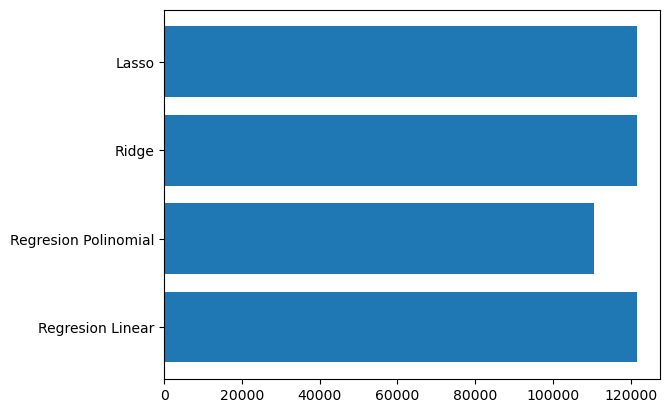

In [31]:
D = MAE

plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), list(D.keys()))
plt.show()

##### R2

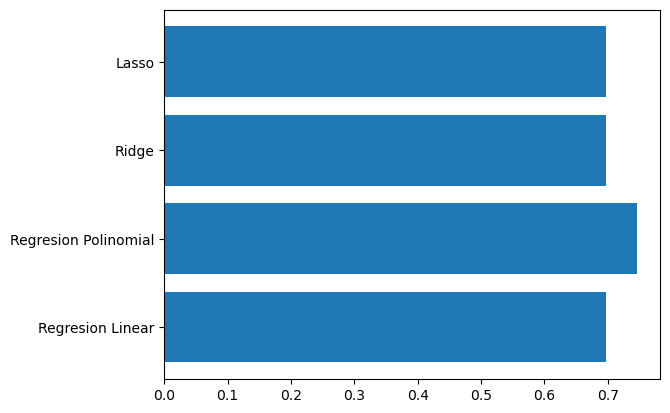

In [32]:
D = R2

plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), list(D.keys()))
plt.show()

#### 2.6 Explica resultados.

¿Qué método se aproxima mejor?, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

Nuevamente el método que mejor se aproxima es la Regresió Polinomial, aunque se puede ver por la ecuación que los términos de manera independiente e incluso algunas combinaciones de los mismos tienen coeficientes donde hasta centésimas (decimal al cual se redondearon) no tienen valor. Esto nos habla que si bien cada feature tiene probablmente un peso en conjunto, de manera individual no afecta de manera considerable al modelo.

Para el porcentaje de entrenamiento y prueba, se probó de igual forma con distintas relaciones de manera manual, aunque para poder tener certeza que los porcentajes son adecuadoes, se tendría que hacer uso de la función learning_curve de sklearn.

#### 2.7 Conclusiones

En el caso de los modelos polinomiales, el hecho de que algunas variables tuvieran un valor muy pequeño para el modelo, nos indica que probablemente no son representativas para nuestra variable de salida, o bien, se explican a partir de alguna otra variable. Un caso donde probablemente una variable no tiene influencia es la fecha en que se registró la casa. Por otro lado, variables que pueden estar fuertemente correlacionadas serían los metro cuadrados de construcción y el número de pisos. Por tal motivo, antes de aplicar un modelo de Regresión Polinomial Múltiple, conviene evaluar la convenienca de aplicar primer SVC, de tal manera que se pueda validar la opción de reducir elementos a tener en cuenta para la regresión.

Otro punto importante es que se corrieron los modelos con los valores que tenían por default, sin considerar que algunos ajustes podrían mejorar las métricas que se estaban teniendo en cuenta. Una vez que se tiene un conocimiento sobre el comportamiento de los datos, sería recomendable realizar un búsqueda de los mejores parámetros, así como realizar varias corridas de los modelos empleando Validación Cruzada. Para esto, se podría emplear la función GridSearchCV de sklearn y evaluar si existe alguna mejoría.

### Ejercicio 3. K means.

Este notebook se basa en información de target

<img src="https://www.america-retail.com/static//2020/12/target01.jpg" alt="drawing" width="600"/>

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

Importa la base de datos

In [33]:
path = 'https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv'
df = pd.read_csv(path)

Exploremos los datos.

In [34]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [36]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

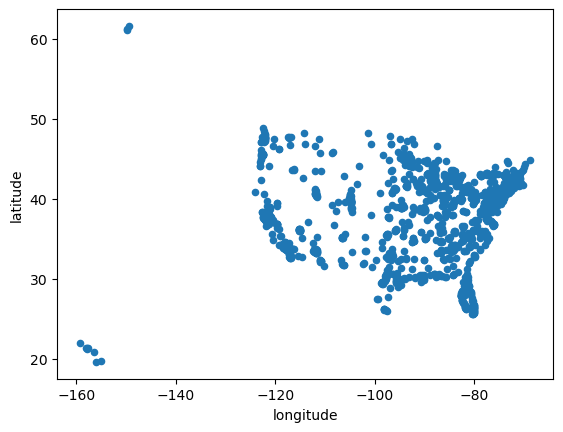

In [37]:
latlong.plot.scatter( "longitude","latitude")

In [38]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.

In [39]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [40]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [41]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [42]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

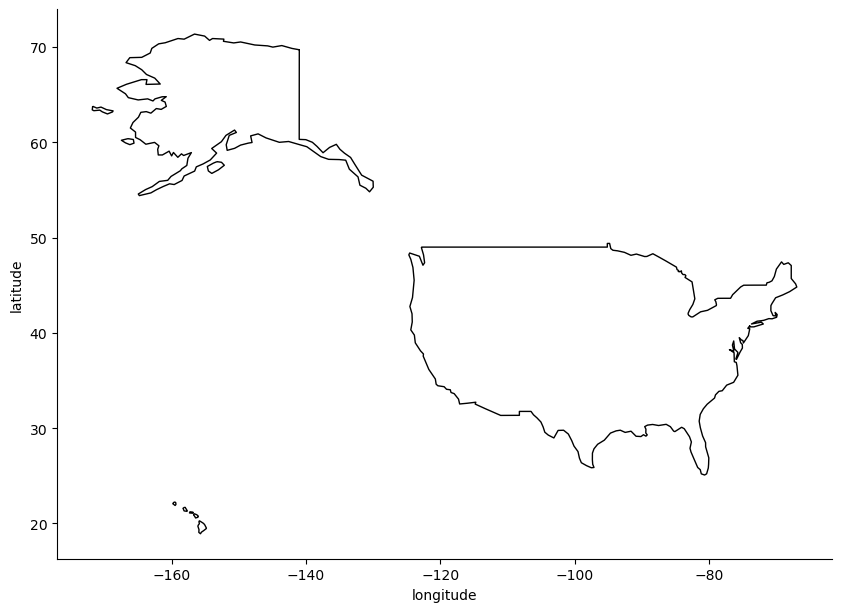

In [43]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

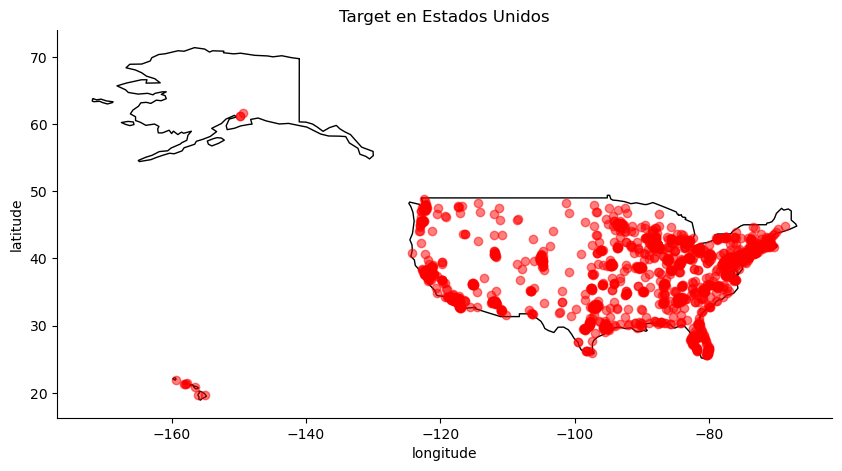

In [44]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿Qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

**Ejercicio**
1. Encuentra el numero ideal de almacenes, justifica tu respuesta:

 * Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

 * ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

#### 3.1 Exploración de datos.

En un primer momento se vuelven a importar los datos de las tiendas de Target.

In [45]:
df = pd.read_csv(path)
stores = df[['latitude', 'longitude']]

stores['Coordinates'] = list(zip(stores['longitude'], stores['latitude']))
stores['Coordinates'] = stores['Coordinates'].apply(Point)

g_stores = gpd.GeoDataFrame(stores, geometry='Coordinates')

Antes de dar una respuesta al número ideal de tiendas, se va a crear un modelo donde de manera manual se van a intercambiar los números de clusters para comprender el comportamiendo de los mismos dados nuestros datos.

In [46]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(stores[['latitude', 'longitude']])

classification = kmeans.predict(stores[['latitude', 'longitude']])
stores['classification'] = classification

centers = kmeans.cluster_centers_
centers = pd.DataFrame(centers, columns=['latitude', 'longitude'])
centers['Coordinates'] = list(zip(centers['longitude'], centers['latitude']))
centers['Coordinates'] = centers['Coordinates'].apply(Point)

g_centers = gpd.GeoDataFrame(centers, geometry='Coordinates')

Posteriormente se grafican en un mapa.

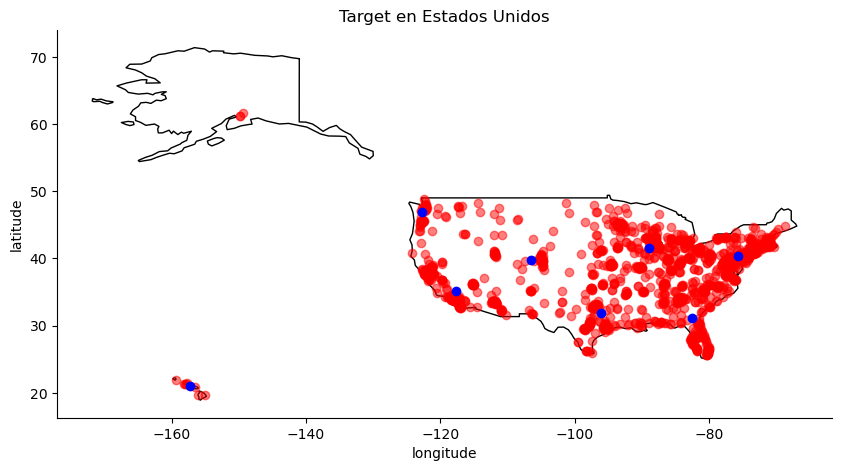

In [47]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

g_stores.plot(ax=gax, color='red', alpha = 0.5)
g_centers.plot(ax=gax, color='blue', alpha = 1)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Se imprimen la cantidad de tiendas por cluster y se llega a la conclusión que a partir de 2 clusters, existe un desbalance en el número de tiendas que tendría que atende cada almacén (cluster). Por tal motivo, se planea eliminar los datos de Alaska y Hawai, debido a que se considera que estos meten ruido y al estar en torritorios anexos a el gruso de la superficie de Estados Unidos, se deben de tratar como un tema aparte en el análisis y las decisiones de negocio que se tomen en términos de almancenes.

In [48]:
stores['classification'].value_counts()

0    484
2    451
1    264
3    260
4    208
7     90
6     74
5      8
Name: classification, dtype: int64

In [49]:
stores = stores[stores['longitude'] > -140]
stores['Coordinates'] = list(zip(stores['longitude'], stores['latitude']))
stores['Coordinates'] = stores['Coordinates'].apply(Point)

g_stores = gpd.GeoDataFrame(stores, geometry='Coordinates')

Se vuelve a realizar el mismo análisis sin los valores con latitud menos a -140.

In [50]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(stores[['latitude', 'longitude']])

classification = kmeans.predict(stores[['latitude', 'longitude']])
stores['classification'] = classification

centers = kmeans.cluster_centers_
centers = pd.DataFrame(centers, columns=['latitude', 'longitude'])
centers['Coordinates'] = list(zip(centers['longitude'], centers['latitude']))
centers['Coordinates'] = centers['Coordinates'].apply(Point)

g_centers = gpd.GeoDataFrame(centers, geometry='Coordinates')

Se realiza el siguiente código donde se puede ver cada cluster con un color específico y los centroides de color rojo.

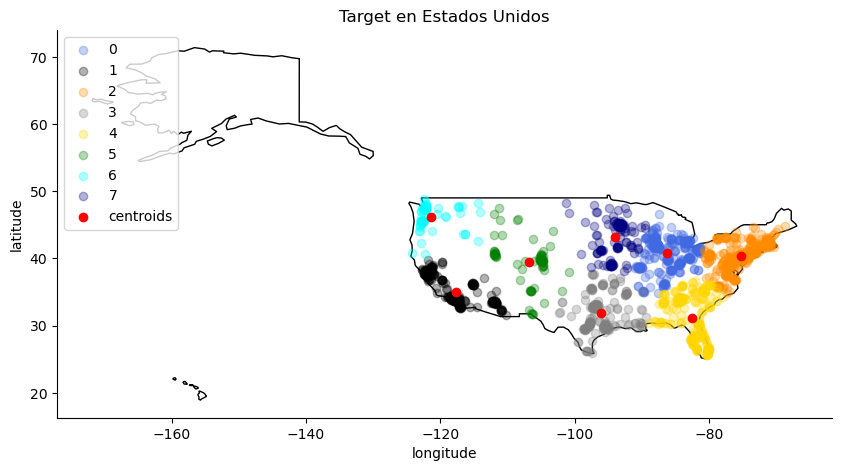

In [51]:
classes = stores['classification'].unique()
classes.sort()
colors = ['royalblue', 'black', 'darkorange', 'grey', 'gold', 'green', 'cyan', 'navy', 'purple', 'lime', 'violet']

fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

for i in classes:
    g_stores[g_stores['classification'] == i].plot(ax=gax, color=colors[i], alpha = 0.3, label=str(i))

g_centers.plot(ax=gax, color='red', alpha = 1, label=str('centroids'))    

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend()
plt.show()

In [52]:
classes.sort()
classes

array([0, 1, 2, 3, 4, 5, 6, 7])

In [53]:
stores['classification'].value_counts()

2    455
0    338
1    263
4    260
3    206
7    148
5     86
6     72
Name: classification, dtype: int64

#### 3.2 Selección de número de clusters.

Ahora que se puede apreciar de mejor manera la ubicación de los almacenes (centroides) de cada grupo de tiendas (clusters), se puede ver que si bien sigue habiendo un desequilibrio en la cantidad de tiendas para los clusters propuestos, igual existe una diferencia en las distancias de algunos de los puntos.

Por tal motivo, se realizarán ciclos en donde cambiando la cantidad de clusters se vea el score que da por default el k-menas, así como el score silhouette, el cual calcula las distancias promedio de cada punto clasificado al centroide de su cluster. De esta manera vamos a poder asegurarnos que si bien el número de tiendas no es balanceado para todas los almacenes, al menos las distancias de todas las tiendas por cluster al respectivo almacén, sí.

Para escoger la métrica de silhouette me basé en este artículo donde muestran otras tres métricas para poder evaluar el comportamiento de k-means a una distinta cantidad de clusters.

https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6

In [54]:
km_scores= []
km_silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stores[['latitude', 'longitude']])
    classification = kmeans.predict(stores[['latitude', 'longitude']])

    km_scores.append(-kmeans.score(stores[['latitude', 'longitude']]))
    
    silhouette = silhouette_score(stores[['latitude', 'longitude']], classification)
    km_silhouette.append(silhouette)
    
#     print("Score for number of cluster(s) {}: {}".format(i,kmeans.score(stores[['latitude', 'longitude']])))
#     print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
#     print("-"*100)

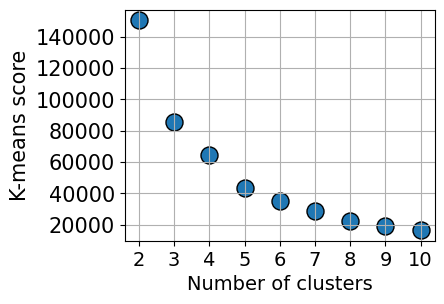

In [55]:
plt.figure(figsize=(4,3))
plt.scatter(x=[i for i in range(2,11)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

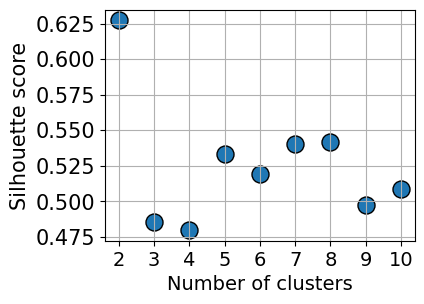

In [56]:
plt.figure(figsize=(4,3))
plt.scatter(x=[i for i in range(2,11)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Una vez que se obtienen las gráficas de cómo cambia cada score con respecto al número de clusters, es dificil ver algún punto de inflexión claro a partir del cual mejore de manera notable. Por otro lado, la gráfica de Silhouette score muesta la tendencia esperada donde empezando en dos clusters baja, para después subir y después se puede apreciar un pico en 5. De esta manera sabemos que despue´s de 4 el 5 tiene una grán mejoría en términos de distancia al centroide. Corriendo el modelo con el parámetro seleccionado, se obtiene lo siguiente:

In [57]:
df = pd.read_csv(path)
stores = df[['latitude', 'longitude']]

stores = stores[stores['longitude'] > -140]
stores['Coordinates'] = list(zip(stores['longitude'], stores['latitude']))
stores['Coordinates'] = stores['Coordinates'].apply(Point)

g_stores = gpd.GeoDataFrame(stores, geometry='Coordinates')

In [58]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(stores[['latitude', 'longitude']])

classification = kmeans.predict(stores[['latitude', 'longitude']])
stores['classification'] = classification

centers = kmeans.cluster_centers_
centers = pd.DataFrame(centers, columns=['latitude', 'longitude'])
centers['Coordinates'] = list(zip(centers['longitude'], centers['latitude']))
centers['Coordinates'] = centers['Coordinates'].apply(Point)

g_centers = gpd.GeoDataFrame(centers, geometry='Coordinates')

#### 3.3 Obtención de las tiendas que surtirá.

Se obtiene la cantidad de tiendas que atenderá cada almacén, así como desplegar la gráfica con los cluster previamente seleccionados.

In [59]:
stores['classification'].value_counts()

0    480
3    422
1    359
2    294
4    273
Name: classification, dtype: int64

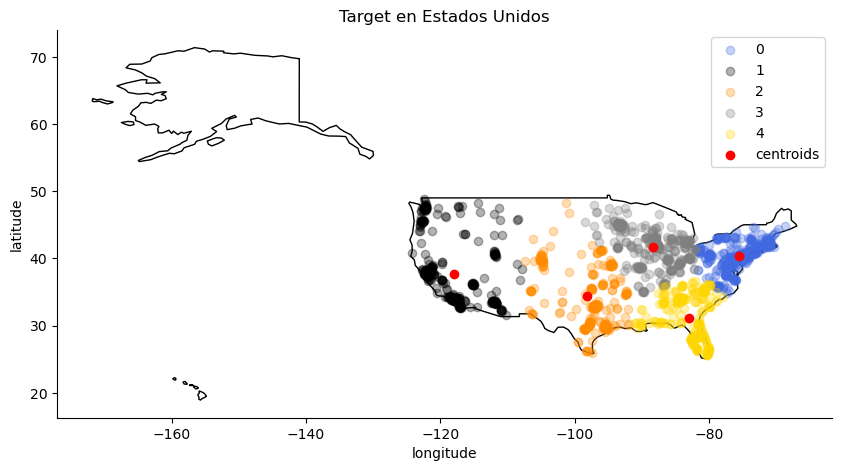

In [60]:
classes = stores['classification'].unique()
classes.sort()
colors = ['royalblue', 'black', 'darkorange', 'grey', 'gold', 'green', 'cyan', 'navy', 'purple', 'lime', 'violet']

fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

for i in classes:
    g_stores[g_stores['classification'] == i].plot(ax=gax, color=colors[i], alpha = 0.3, label=str(i))

g_centers.plot(ax=gax, color='red', alpha = 1, label=str('centroids'))    

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend()
plt.show()

#### 3.4 Obtención de distancia de cada tienda a su almacén.

Ya que parte de las preguntas es la distancia que tienen los almacenes a sus respectivas tiendas, se agregará una función que realice este cálculo y lo agregue al DataFrame de stores.

In [61]:
def distance(latitude, longitude, classification):
    lat  = latitude  - centers['latitude'][classification]
    long = longitude - centers['longitude'][classification]
    distance = np.sqrt(lat**2 + long**2)
    return distance

In [62]:
stores['Distance'] = stores.apply(lambda x: distance(x['latitude'], x['longitude'], x['classification']), axis=1)
stores

,latitude,longitude,Coordinates,classification,Distance
0,33.224225,-86.804174,POINT (-86.80417 33.22423),4,4.413729
1,33.334550,-86.989778,POINT (-86.98978 33.33455),4,4.629519
2,30.602875,-87.895932,POINT (-87.89593 30.60287),4,4.988067
3,34.560148,-86.971559,POINT (-86.97156 34.56015),4,5.315523
4,31.266061,-85.446422,POINT (-85.44642 31.26606),4,2.518555
...,...,...,...,...,...
1834,43.034293,-88.176840,POINT (-88.17684 43.03429),3,1.288458
1835,42.989604,-88.259806,POINT (-88.25981 42.98960),3,1.234118
1836,42.846799,-106.264166,POINT (-106.26417 42.84680),2,11.679058
1837,41.162019,-104.800048,POINT (-104.80005 41.16202),2,9.449999


In [63]:
for i in classes:
    print('La clase {} tiene una suma de {:.2f} en el conjunto de todas sus tiendas'.format(i, stores['Distance'][stores['classification'] == i].sum()))

La clase 0 tiene una suma de 1416.98 en el conjunto de todas sus tiendas
La clase 1 tiene una suma de 2052.20 en el conjunto de todas sus tiendas
La clase 2 tiene una suma de 1566.29 en el conjunto de todas sus tiendas
La clase 3 tiene una suma de 1594.23 en el conjunto de todas sus tiendas
La clase 4 tiene una suma de 1103.08 en el conjunto de todas sus tiendas


Se puede observar que 3 de los 5 almacenes tienen un aproximada de 1500 hacia todas sus tiendas, mientras que la que más distancia acumula es aproximadamente 200 y la que menos tiene distnacia está cercana a los 1100. Este es el equilibrio que se estaba buscando con la métrica de Silhouette.

#### 3.5 Obtener dirección de almacenes.

La siguiente parte es ubicar las ciudades donde se econtrarán nuestros almacenes.

In [64]:
centers['County'] = ''
centers['State'] = ''
centers['Address'] = ''

# geopy.geocoders.options.default_user_agent = "my-application"
geolocator = Nominatim(user_agent="my_request")

for i in range(len(centers)):
    location = geolocator.reverse('{}, {}'.format(centers['latitude'][i], centers['longitude'][i]), addressdetails=True) 
    centers['County'][i] = location.raw['address']['county']
    centers['State'][i] = location.raw['address']['state']
    centers['Address'][i] = location.address
#     print(location.raw['address']['county'])

centers

,latitude,longitude,Coordinates,County,State,Address
0,40.345897,-75.598224,POINT (-75.59822 40.34590),Montgomery County,Pennsylvania,"Schlegel Road, Douglass Township, Montgomery C..."
1,37.752279,-118.009422,POINT (-118.00942 37.75228),Esmeralda County,Nevada,"Esmeralda County, Nevada, United States"
2,34.398684,-98.200065,POINT (-98.20006 34.39868),Cotton County,Oklahoma,"Cotton County, Oklahoma, United States"
3,41.760441,-88.370288,POINT (-88.37029 41.76044),Kane County,Illinois,"2264, Wynwood Lane, Aurora, Aurora Township, K..."
4,31.103912,-82.933092,POINT (-82.93309 31.10391),Clinch County,Georgia,"Foyd Lee Loop, Clinch County, Georgia, United ..."


Ya que el DataFrame no permite ver toda la información de las direcciones, se imprimirá la dirección de cada almacén. Se valida con un mapa de Estados Unidos que los almacenes estén efectivamente en los estados que se muestran en la tabla anterior.

In [65]:
for i in range(len(centers)):
    print('El almacén {} está en {}'.format(i, centers['Address'][i]))

El almacén 0 está en Schlegel Road, Douglass Township, Montgomery County, Pennsylvania, 19525, United States
El almacén 1 está en Esmeralda County, Nevada, United States
El almacén 2 está en Cotton County, Oklahoma, United States
El almacén 3 está en 2264, Wynwood Lane, Aurora, Aurora Township, Kane County, Illinois, 60506, United States
El almacén 4 está en Foyd Lee Loop, Clinch County, Georgia, United States


#### 3.6 Análisis de librerías para datos geoespaciales.

Directamente empleadas en esta práctica tenemos la librería de **geopandas** y **geopy**.

**Geopandas** es una librería que permite crear DataFrames que son al mismo tiempo Sistemas de Información Geográficos (GIS por sus siglas en inglés). En este sentido, permite llevar a cabo operaciones de tipo geométrico, pero de igual manera tiene acceso a información predeterminada de localizaciones y superficies. Para correr se apoya mucho en matplotlib, shapely y fiona, siendo la penúltima parte también de esta lista.

**GeoPy** es una librería que facilita el acceso a la localización de direcciones a partir de las cooordenadas. Las direcciones incluyen a su vez ciudades, países y, en ocasiones, hasta dirección postal.

**Shapely** es una librería que permite la creación de objetos geométricos como puntos (Point), polígonos (Polygon) y multi-polígonos (Multipolygon), así como manipularlos con cálculos de áreas o intersecciones entre ellas.

En resumen, las librerías de Python para manejo de datos geoespaciales es muy util para cuando se quieren poder visualizar punto coordinados, ya que no solo se analizan como puntos, sino que nos puede dar un contexto más real de la información como lo es el país y ubicación dentro de este donde está, pero también direcciones físicas de un punto basados en bases de datos similares a lo que emplea Google Maps o Waze.

#### 3.7 Conclusiones.

Anteriormente ya había empleado k-means como herramienta de agrupamiento, pero no lo había hecho para datos geoespaciales, lo cual le dió una nueva perspectiva su uso. Adicional a esto, ya había trabajado con datos geoespaciales en Matlab, pero en Python no, por lo que esta actividad fue una buena oportunidad para poner ambos conceptos a prueba de manera simultánea.

Hablando nuevamenete del K-means, uno de los retos a los que me enfrenté fue el escoger la métrica adecuada para saber cuántos clusters son los que serían los idoneos. Para esto, el 'score' que tiene k-means por default no fue de mucha ayuda para escoger el punto óptimo, pero el utilizar la métrica de silhouette aportó una perspectiva diferente sobre cuál es coger y por qué razón.

Las tiendas que estaban en Alaska y Hawaii fueron excluidas con la intención de intentar evitar meter ruido al correr el k-means, pero son localizaciones que requieren un análisis más profundo y que pueden llevar a una solución totalmente independiente al k-means. Una opción pensando desde el punto de vista del negocio, sería poner el almacén no por la cercanía a las ubicaciones de esas tiendas, sino por la cercanía a un puerto marítimo o un aeropuerto, ya que al no poderse transportar por tierra, muy probablemente se mueva la mercancía por una de estas vías.

La opción de evaluar los clusters dentro del k-means por distancia (silhouette) me parece acertada, ya que si bien no todos pueden estar cerca del almacén, las distancias promedio que se tienen de cada tienda a este por almacén, se encuentran equilibradas. Desde un punto de vista del negocio, es una forma de minimizar el consumo de combustible o los tiempos de traslado.

Por último, quisiera resaltar la importancia que tuvo en este caso la representación geoespacial. Si bien el poder representar los puntos en un mapa fue de gran ayuda, hubo otro factores como el uso de colores en los puntos o poner las tiendas más tenues que los almacenes. Esto fue importante para la interpretación del k-means, así como para validar de manera empírica que la colocación es adecuada.